In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import re
import serial
import time
import pandas as pd

In [2]:
PORTNAME = '/dev/ttyUSB1'


def get_reading(port, timeout=1.0):
    start = time.time()
    while time.time() - start < timeout:
        line = port.readline()
        match = re.match(r'READ (.*)', line.decode('UTF-8'))
        if match:
            words = match.group(1).split()
            values = [int(w) for w in words]
            return values
    return None # Timeout

In [3]:
# Use stop button to interrupt ongoign data collection
data = []

with serial.Serial(PORTNAME, 115200, timeout=1.0) as port:
    while True:
        row = get_reading(port)
        data.append(row)

KeyboardInterrupt: 

In [4]:
with open('data3.json', 'w') as f:
    f.write(json.dumps(data))

In [6]:
import numpy as np
def invert(x):
    y = []
    for row in x:
        y.append([1 / z for z in row])
    return y

def delta(x):
    x0 = x[0]
    y = []
    for row in x:
        y.append([a - b for a,b in zip(x0, row)])
    
    cal = np.max(y, axis=0)
    print(cal)
    y = np.divide(y, cal)
    
    return y
COLS = ['Fwd0 (G6)', 'Fwd1 (G2)', 'Fwd2 (G3)', 'Rev0 (G1)', 'Rev1 (G3)', 'Rev2 (G2)', 'Stop']
df = pd.DataFrame(columns=COLS, data=data)
df_inv = pd.DataFrame(columns=COLS, data=invert(data))
df_delta = pd.DataFrame(columns=COLS, data=delta(data))

[4068 3441 4269 1829 4183  912    0]


/tmp/ipykernel_2165923/1259654087.py:16: RuntimeWarning: invalid value encountered in true_divide
  y = np.divide(y, cal)


In [10]:

fwd_cal = np.array([4068, 3441, 4269])
rev_cal = np.array([1829, 4183,  912])
ref = np.mean([fwd_cal.mean(), rev_cal.mean()])


In [12]:
print(ref / rev_cal)
print(ref / fwd_cal)


[0.58678216 1.34199551 0.29258903]
[1.30510106 1.1039461  1.36958614]


<AxesSubplot:>

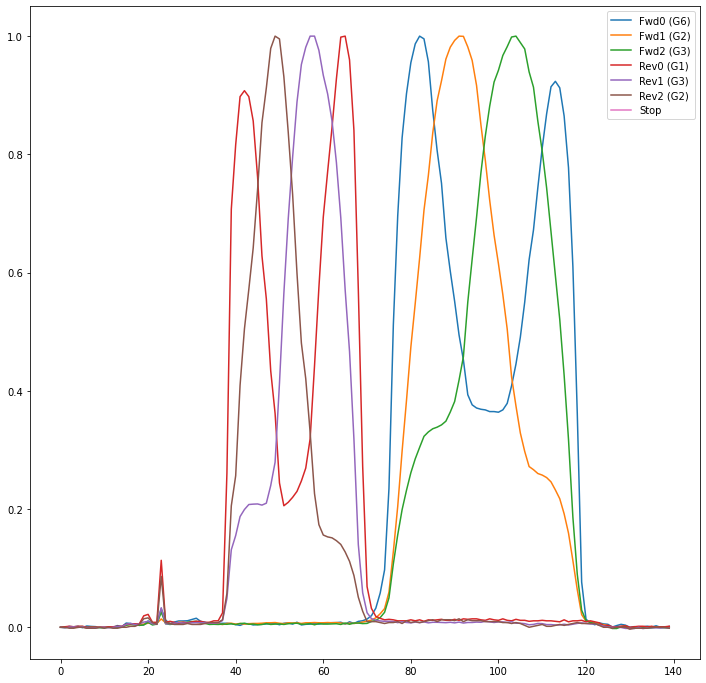

In [55]:
df_delta.plot(figsize=(12,12))

<AxesSubplot:>

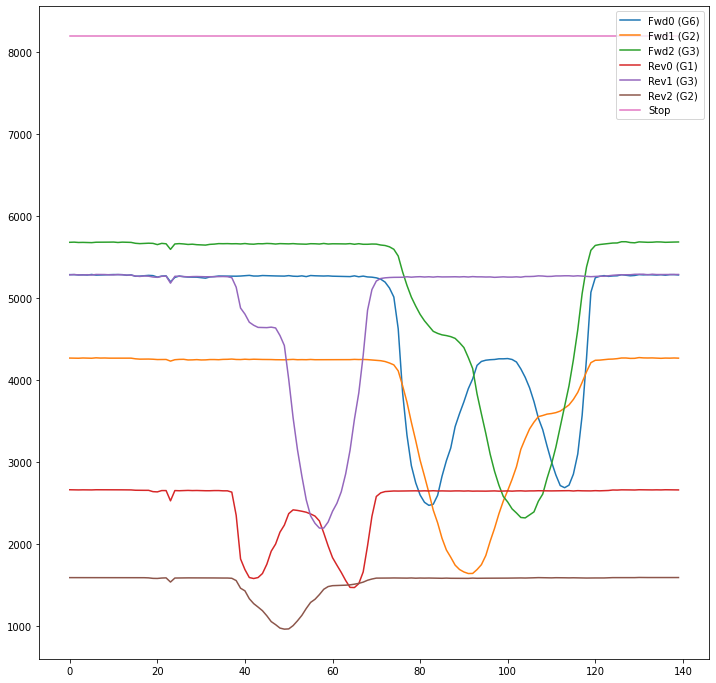

In [56]:
df.plot(figsize=(12,12))